Step 1: Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset 
df = pd.read_csv('KC_housing_data.csv')

# Display the first few rows
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

Step 2: Exploratory Data Analysis (EDA)

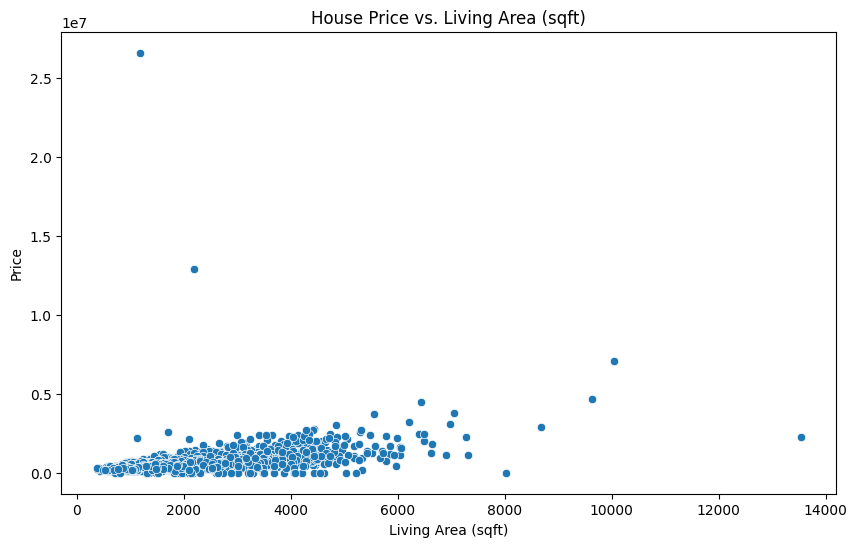

In [3]:
# Visualize key features vs target price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('House Price vs. Living Area (sqft)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

Step 3: Linear Regression - Predicting House Prices

Linear Regression Mean Squared Error: 989173788718.9786


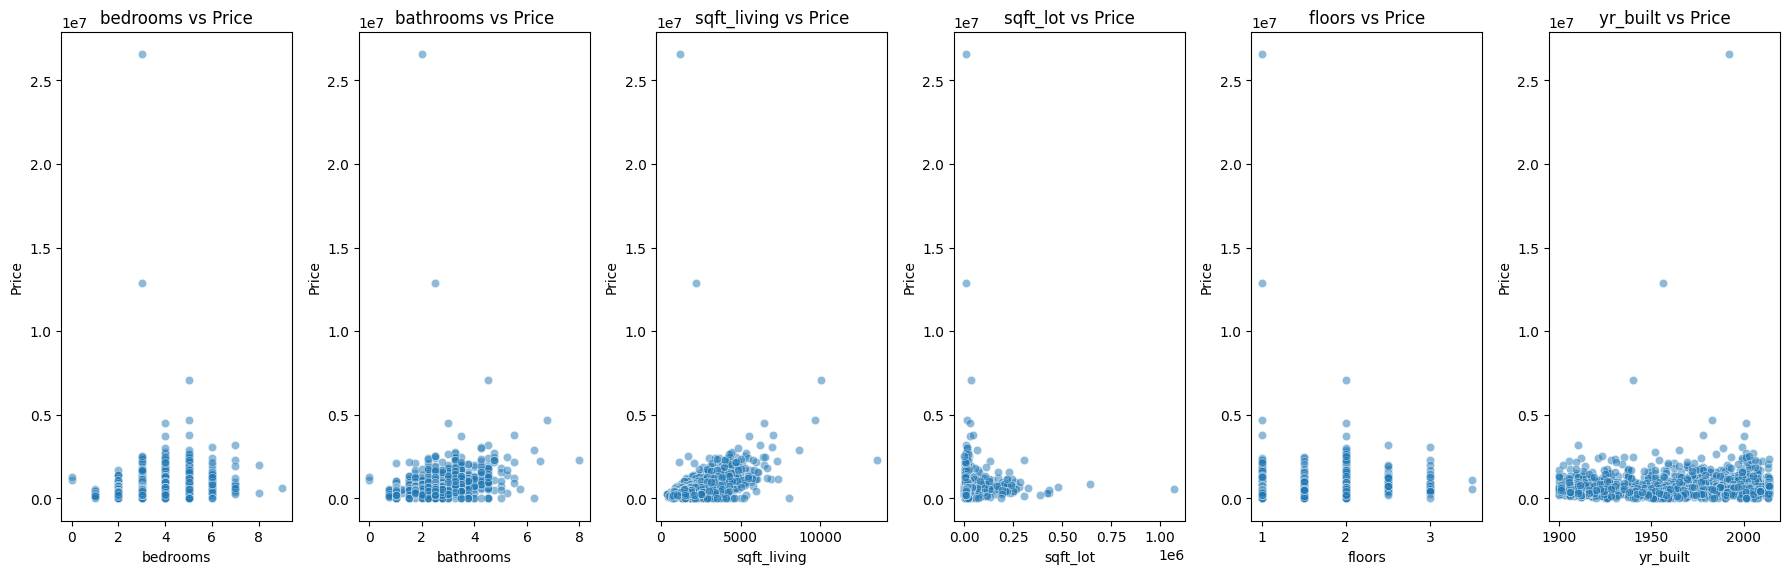

In [5]:
# Task 1: Linear Regression 
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
X = df[features]
y = df['price']

# Split data into train and test sets [cite: 210]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model 
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict on test data 
y_pred_lin = lin_model.predict(X_test)

# Compute Mean Squared Error (MSE) 
mse = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression Mean Squared Error: {mse}")

# Plot true vs predicted prices 
plt.figure(figsize=(18, 6))
for i, feature in enumerate(features):
    plt.subplot(1, 6, i + 1)
    sns.scatterplot(data=df, x=feature, y='price', alpha=0.5)
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


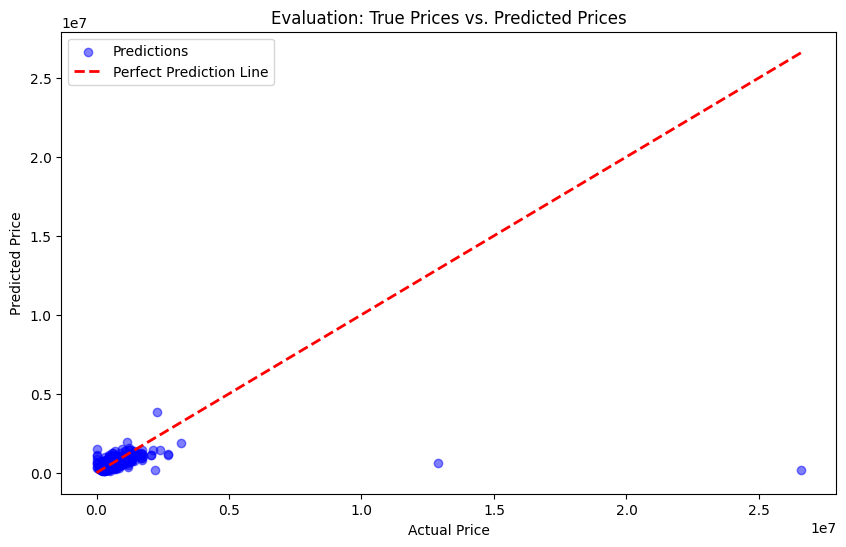

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title('Evaluation: True Prices vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show() 

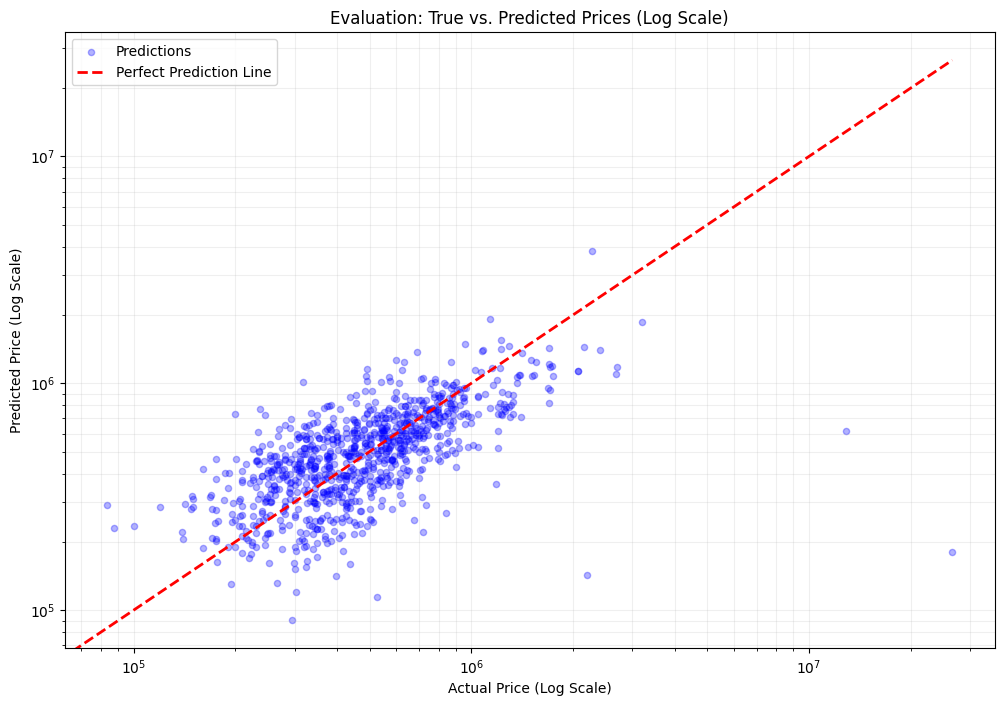

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_lin, alpha=0.3, color='blue', s=20, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')

plt.xscale('log')
plt.yscale('log')

plt.title('Evaluation: True vs. Predicted Prices (Log Scale)')
plt.xlabel('Actual Price (Log Scale)')
plt.ylabel('Predicted Price (Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2) # Adding a grid for clarity
plt.show()